# Convay's Game of Life
> The famous cellular automata program

Convay's Game of Life is a cellular automation deviced by John Convay.
The universe of the Game of Life is a 2D square grid in which each cell is either dead or alive. Each unit of time is another generation in the universe. The cells live or die according to a few simple rules:

1. Any live cell with fewer than two live neighbours dies, as if by underpopulation.
2. Any live cell with two or three live neighbours lives on to the next generation.
3. Any live cell with more than three live neighbours dies, as if by overpopulation.
4. Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.


Let us move to the coding part.

In [10]:
import numpy as np
import matplotlib.pyplot as mpl
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

Initialise the grid and assign a seed colony.

In [23]:
Mi = np.zeros((20,20))

# Mi[5,[4,5,6]] = 1 # a 3-cell block

# Mi[4,[4,5,6]] = Mi[5,[5,6,7]] = 1 
Mi[1,4] = Mi[2,[2,4]] = Mi[3,[3,4]] = 1 # simple space ship
#Mi[10,[10,11]] = Mi[11,[9,10]] = Mi[12,10] = 1 # random pattern

Define the functions for operations

In [24]:

def neighbors(X,Y,M):
    '''A function to find the neighbors indeces'''
    adj = []
    
    for dx in [-1,0,1]:
        for dy in [-1,0,1]:
            
            rangeX = range(0, M.shape[0])  # X bounds
            rangeY = range(0, M.shape[1])  # Y bounds
            
            (newX, newY) = (X+dx, Y+dy)  # adjacent cell
            
            if (newX in rangeX) and (newY in rangeY) and (dx, dy) != (0, 0):
                adj.append((newX, newY))
                
    return adj


def popu(nbs,M):
    ''' function to calculate the population in neighbors'''
    pop = 0
    
    for (x,y) in nbs:
        pop += M[x,y]
        
    return pop

def kalan(state, p):
    ''' function to decide if a cell survives to the next generation or not'''
    if state == 1:
        if p == 3 or p == 2:
            return 1
        elif p < 2 or p > 3:
            return 0

    elif state == 0:
        if p == 3:
            return 1
        else:
            return 0

Now begin from the initial state and advance to next generations by applying the rules.

In [25]:
def next_gen(M0):
    M1 = np.zeros(M0.shape)
    
    for i in range(M0.shape[0]):
        for j in range(M0.shape[1]):
            
            neigh = neighbors(i, j, M0)
            pop = popu(neigh, M0)
            M1[i,j] = kalan(M0[i,j], pop)
            
    return M1

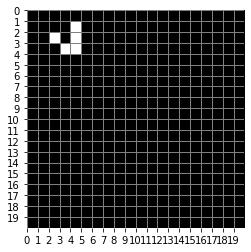

In [26]:
fig, ax = mpl.subplots()
ax.set_aspect('equal')
ax.grid(color='grey', linewidth=1)
ax.set_frame_on(False)
ax.set_xticks(np.arange(0, Mi.shape[1], 1))
ax.set_yticks(np.arange(0, Mi.shape[1], 1))
mat = ax.imshow(Mi,
                extent = (0, Mi.shape[1], Mi.shape[0], 0),
                cmap=mpl.get_cmap('gray'))

def update(i):
    M = mat.get_array()
    M = next_gen(M)
    mat.set_array(M)
    return [mat]

ani = FuncAnimation(fig, update,interval=50)
mpl.show()

In [27]:
HTML(ani.to_jshtml())